In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import PIL
import PIL.Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


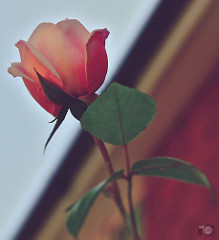

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[6]))

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir,
   validation_split = 0.2,
   subset = "training",
   seed = 123,
   label_mode = 'categorical',
   image_size = (img_height,img_width),
   batch_size = batch_size 
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir,
   validation_split = 0.2,
   subset = "validation",
   seed = 123,
   label_mode = 'categorical',
   image_size = (img_height,img_width),
   batch_size = batch_size 
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
classes = train_data.class_names
print(classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
resnet_model = Sequential()

In [10]:
pretrained = tf.keras.applications.ResNet50(
    include_top = False,
    input_shape = (img_height,img_width,3),
    pooling = 'avg',
    classes = 5,
    weights = 'imagenet'
    ) 
                                            

In [11]:
for layer in pretrained.layers:
  layer.trainable = False

In [12]:
resnet_model.add(pretrained)
resnet_model.add(Flatten())
resnet_model.add(Dense(64, activation = 'relu'))
resnet_model.add(Dense(5, activation = 'softmax'))

In [13]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 64)               131136    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                325       
 pper)                                                           
                                                                 
Total params: 23,719,173
Trainable params: 131,461
Non-trainable params: 23,587,712
______________________________________

In [14]:
resnet_model.compile(optimizer = Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
history = resnet_model.fit(
    train_data,
    validation_data = testing_data,
    epochs = 3
)

Epoch 1/3
92/92 [==============================] - 322s 3s/step - loss: 1.0402 - accuracy: 0.7347 - val_loss: 0.5056 - val_accuracy: 0.8447
Epoch 2/3
92/92 [==============================] - 313s 3s/step - loss: 0.3831 - accuracy: 0.8651 - val_loss: 0.4020 - val_accuracy: 0.8556
Epoch 3/3
92/92 [==============================] - 309s 3s/step - loss: 0.2714 - accuracy: 0.9029 - val_loss: 0.3961 - val_accuracy: 0.8542


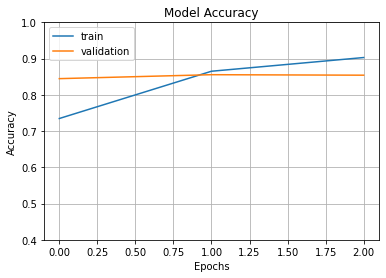

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

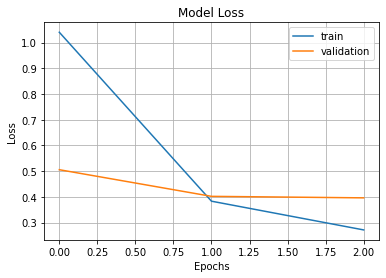

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# **Predicting using the model**

In [30]:
tulips = list(data_dir.glob('tulips/*'))
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))

In [31]:
import cv2
image=cv2.imread(str(tulips[20]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


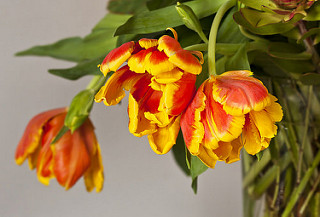

In [33]:
PIL.Image.open(str(tulips[20]))

In [32]:
pred=resnet_model.predict(image)
output_class=classes[np.argmax(pred)]
print(output_class)

1/1 [==============================] - 0s 150ms/step
tulips
